<a href="https://colab.research.google.com/github/pszachew/Music-Genre-Classification/blob/master/training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
import json

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
X = pd.read_csv('/content/gdrive/MyDrive/csv_data/embedded.csv',header=None)

In [5]:
y = pd.read_csv('/content/gdrive/MyDrive/csv_data/labels.csv', header=None)

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_sc =pd.DataFrame(scaler.transform(X))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.3, random_state=10)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg_mod = LogisticRegression(max_iter=10000)

In [ ]:
log_reg_mod.fit(X_train, np.array(y_train).flatten())

In [ ]:
joblib.dump(log_reg_mod, 'log_reg.sav')

['log_reg.sav']

In [ ]:
y_pre_lg = log_reg_mod.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pre_lg))

              precision    recall  f1-score   support

       blues       0.87      0.94      0.90        35
   classical       0.89      1.00      0.94        33
     country       0.81      0.78      0.79        27
       disco       0.88      0.68      0.77        34
      hiphop       0.77      0.96      0.85        24
        jazz       1.00      0.91      0.96        35
       metal       0.97      1.00      0.98        31
         pop       0.77      0.88      0.82        26
      reggae       0.92      0.80      0.86        30
        rock       0.70      0.64      0.67        25

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.87      0.86      0.86       300



In [ ]:
print(confusion_matrix(y_test, y_pre_lg))

[[33  1  0  0  0  0  0  0  0  1]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 2  0 21  2  0  0  0  1  0  1]
 [ 0  1  1 23  2  0  0  4  0  3]
 [ 0  0  0  0 23  0  0  0  1  0]
 [ 1  2  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  2  0  0 23  0  1]
 [ 0  0  1  1  1  0  0  2 24  1]
 [ 2  0  3  0  2  0  1  0  1 16]]


In [ ]:
kf3 = KFold(n_splits=3, shuffle=True)
mod_lg = LogisticRegression(max_iter=10000)

In [ ]:
i=1
for x_train_idx, x_test_idx in kf3.split(X_sc):
  X_train = X_sc.iloc[x_train_idx]
  X_test = X_sc.iloc[x_test_idx]
  y_train = y.iloc[x_train_idx]
  y_test = y.iloc[x_test_idx]
  mod_lg.fit(X_train, np.array(y_train).flatten())
  print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, mod_lg.predict(X_test))}")
  i=i+1

Accuracy for the fold no. 1 on the test set: 0.8618618618618619
Accuracy for the fold no. 2 on the test set: 0.8678678678678678
Accuracy for the fold no. 3 on the test set: 0.8318318318318318


## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 4)
neigh.fit(X_train, np.array(y_train).flatten())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
acc_ls = []
for n in range (3,20):
  neigh = KNeighborsClassifier(n_neighbors = n)
  neigh.fit(X_train, np.array(y_train).flatten())
  acc_ls.append(accuracy_score(y_test, neigh.predict(X_test)))

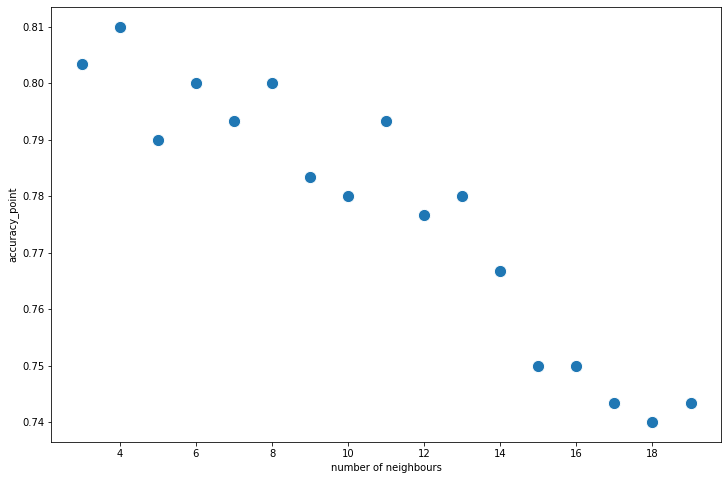

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=range(3,20), y=acc_ls, s=150)
plt.ylabel('accuracy_point')
plt.xlabel('number of neighbours')
plt.show()

In [ ]:
kf3 = KFold(n_splits=3, shuffle=True)
mod_knn = KNeighborsClassifier(n_neighbors=4)
i=1
for x_train_idx, x_test_idx in kf3.split(X_sc):
  X_train = X_sc.iloc[x_train_idx]
  X_test = X_sc.iloc[x_test_idx]
  y_train = y.iloc[x_train_idx]
  y_test = y.iloc[x_test_idx]
  mod_knn.fit(X_train, np.array(y_train).flatten())
  print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, mod_knn.predict(X_test))}")
  i=i+1

Accuracy for the fold no. 1 on the test set: 0.7717717717717718
Accuracy for the fold no. 2 on the test set: 0.7747747747747747
Accuracy for the fold no. 3 on the test set: 0.8078078078078078


### **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
kernels = {'linear':[], 'poly':[], 'rbf':[], 'sigmoid':[]}

In [ ]:
kf3 = KFold(n_splits=3, shuffle=True)

In [ ]:
i=1
for x_train_idx, x_test_idx in kf3.split(X_sc):
  X_train = X_sc.iloc[x_train_idx]
  X_test = X_sc.iloc[x_test_idx]
  y_train = y.iloc[x_train_idx]
  y_test = y.iloc[x_test_idx]
  for kernel in kernels.keys():
    mod_svm = SVC(kernel=kernel)
    mod_svm.fit(X_train, np.array(y_train).flatten())
    kernels[kernel].append(accuracy_score(y_test, mod_svm.predict(X_test)))
    print(f"Accuracy for the fold no. {i} withe kernel = {kernel} on the test set: {kernels[kernel][i-1]}")
  i=i+1
  print('')

Accuracy for the fold no. 1 withe kernel = linear on the test set: 0.8558558558558559
Accuracy for the fold no. 1 withe kernel = poly on the test set: 0.48348348348348347
Accuracy for the fold no. 1 withe kernel = rbf on the test set: 0.8108108108108109
Accuracy for the fold no. 1 withe kernel = sigmoid on the test set: 0.8228228228228228

Accuracy for the fold no. 2 withe kernel = linear on the test set: 0.8468468468468469
Accuracy for the fold no. 2 withe kernel = poly on the test set: 0.6516516516516516
Accuracy for the fold no. 2 withe kernel = rbf on the test set: 0.7957957957957958
Accuracy for the fold no. 2 withe kernel = sigmoid on the test set: 0.8048048048048048

Accuracy for the fold no. 3 withe kernel = linear on the test set: 0.8558558558558559
Accuracy for the fold no. 3 withe kernel = poly on the test set: 0.5135135135135135
Accuracy for the fold no. 3 withe kernel = rbf on the test set: 0.8138138138138138
Accuracy for the fold no. 3 withe kernel = sigmoid on the test s

In [ ]:
acc_mean = []
for key in kernels.keys():
  acc_mean.append(mean(kernels[key]))

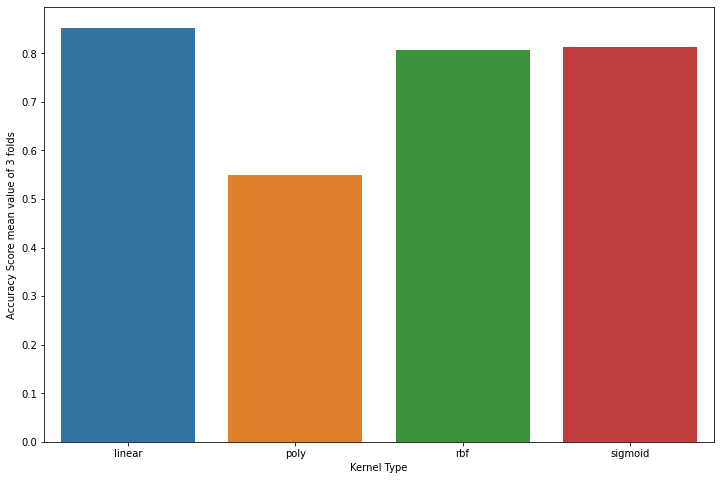

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=list(kernels.keys()), y=acc_mean)
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy Score mean value of 3 folds')
plt.show()

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
kf3 = KFold(n_splits=3, shuffle=True)

In [ ]:
acc_dic_dt = {}
for n in range(3,20):
  acc_dic_dt.setdefault(n,[])
i=1
for x_train_idx, x_test_idx in kf3.split(X_sc):
  X_train = X_sc.iloc[x_train_idx]
  X_test = X_sc.iloc[x_test_idx]
  y_train = y.iloc[x_train_idx]
  y_test = y.iloc[x_test_idx]
  for n in range (3,20):
    clf = DecisionTreeClassifier(max_depth=n)
    clf.fit(X_train, y_train)
    acc_dic_dt[n].append(accuracy_score(y_test, clf.predict(X_test)))
    print(f"Accuracy for the fold no. {i} with max depth:{n} on the test set: {acc_dic_dt[n][i-1]}")
  i = i+1
  print('')

Accuracy for the fold no. 1 with max depth:3 on the test set: 0.2552552552552553
Accuracy for the fold no. 1 with max depth:4 on the test set: 0.2822822822822823
Accuracy for the fold no. 1 with max depth:5 on the test set: 0.3213213213213213
Accuracy for the fold no. 1 with max depth:6 on the test set: 0.3633633633633634
Accuracy for the fold no. 1 with max depth:7 on the test set: 0.40540540540540543
Accuracy for the fold no. 1 with max depth:8 on the test set: 0.4144144144144144
Accuracy for the fold no. 1 with max depth:9 on the test set: 0.4144144144144144
Accuracy for the fold no. 1 with max depth:10 on the test set: 0.4144144144144144
Accuracy for the fold no. 1 with max depth:11 on the test set: 0.4114114114114114
Accuracy for the fold no. 1 with max depth:12 on the test set: 0.44144144144144143
Accuracy for the fold no. 1 with max depth:13 on the test set: 0.4294294294294294
Accuracy for the fold no. 1 with max depth:14 on the test set: 0.40540540540540543
Accuracy for the fol

In [ ]:
with open("/content/gdrive/MyDrive/json_data/dt.json","w") as outfile:
  json.dump(acc_dic_dt, outfile)

In [ ]:
with open('/content/gdrive/MyDrive/json_data/dt.json') as json_file:
  inp = json.load(json_file)

In [ ]:
acc_mean_dt = []
for key in inp.keys():
  acc_mean_dt.append(mean(inp[key]))

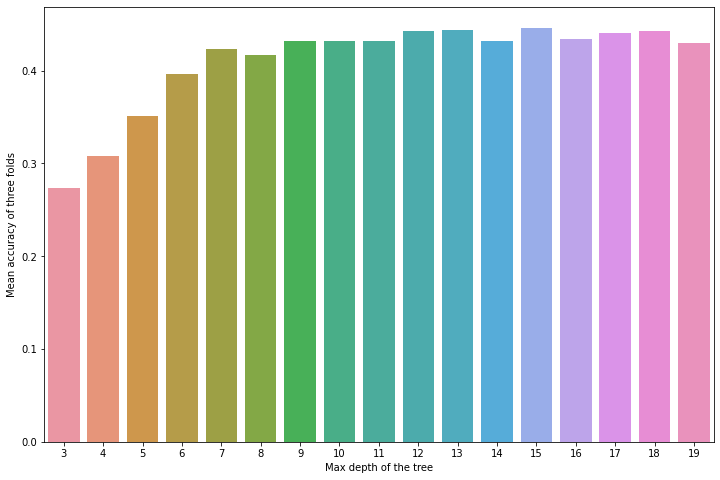

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=list(inp.keys()), y=acc_mean_dt)
plt.xlabel('Max depth of the tree')
plt.ylabel('Mean accuracy of three folds')
plt.show()

### **Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
kf3 = KFold(n_splits=3, shuffle=True)

In [ ]:
acc_dic_rfc = {}
for n in range(100, 1001,100):
  acc_dic_rfc.setdefault(n,[])

i=1
for train_idx, test_idx in kf3.split(X_sc):
  X_train = X_sc.iloc[train_idx]
  X_test = X_sc.iloc[test_idx]
  y_train = y.iloc[train_idx]
  y_test = y.iloc[test_idx]
  for n in range(100, 1001,100):
    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train, np.array(y_train).flatten())
    acc_dic_rfc[n].append(accuracy_score(y_test, rfc.predict(X_test)))
    print(f"Accuracy for the fold no. {i} with n_estimators:{n} on the test set: {acc_dic_rfc[n][i-1]}")
  i = i+1
  print('')


Accuracy for the fold no. 1 with n_estimators:100 on the test set: 0.7267267267267268
Accuracy for the fold no. 1 with n_estimators:200 on the test set: 0.7327327327327328
Accuracy for the fold no. 1 with n_estimators:300 on the test set: 0.7327327327327328
Accuracy for the fold no. 1 with n_estimators:400 on the test set: 0.7507507507507507
Accuracy for the fold no. 1 with n_estimators:500 on the test set: 0.7417417417417418
Accuracy for the fold no. 1 with n_estimators:600 on the test set: 0.7417417417417418
Accuracy for the fold no. 1 with n_estimators:700 on the test set: 0.7417417417417418
Accuracy for the fold no. 1 with n_estimators:800 on the test set: 0.7537537537537538
Accuracy for the fold no. 1 with n_estimators:900 on the test set: 0.7507507507507507
Accuracy for the fold no. 1 with n_estimators:1000 on the test set: 0.7387387387387387

Accuracy for the fold no. 2 with n_estimators:100 on the test set: 0.7477477477477478
Accuracy for the fold no. 2 with n_estimators:200 on

In [ ]:
with open("/content/gdrive/MyDrive/json_data/rfc.json","w") as outfile:
  json.dump(acc_dic_rfc, outfile)

In [ ]:
with open('/content/gdrive/MyDrive/json_data/rfc.json') as json_file:
  inp = json.load(json_file)

### **Gradient Boosting**

In [ ]:
import xgboost as xgb

In [ ]:
kf3 = KFold(n_splits=3, shuffle=True)

In [ ]:
max_depths = range(5,16)

In [ ]:
acc_dic_gb = {}
for n in max_depths:
  acc_dic_gb.setdefault(n,[])
i=1
for train_idx, test_idx in kf3.split(X_sc):
  X_train = X_sc.iloc[train_idx]
  X_test = X_sc.iloc[test_idx]
  y_train = y.iloc[train_idx]
  y_test = y.iloc[test_idx]
  for n in max_depths:
    xgbc = xgb.XGBClassifier(max_depths=n, learning_rate=0.1)
    xgbc.fit(X_train, np.array(y_train).flatten())
    acc_dic_gb[n].append(accuracy_score(y_test, xgbc.predict(X_test)))
    print(f"Accuracy for the fold no. {i} with n_estimators:{n} on the test set: {acc_dic_gb[n][i-1]}")
  i = i+1
  print('')

Accuracy for the fold no. 1 with n_estimators:5 on the test set: 0.7657657657657657
Accuracy for the fold no. 1 with n_estimators:6 on the test set: 0.7657657657657657
Accuracy for the fold no. 1 with n_estimators:7 on the test set: 0.7657657657657657
Accuracy for the fold no. 1 with n_estimators:8 on the test set: 0.7657657657657657
Accuracy for the fold no. 1 with n_estimators:9 on the test set: 0.7657657657657657
Accuracy for the fold no. 1 with n_estimators:10 on the test set: 0.7657657657657657
Accuracy for the fold no. 1 with n_estimators:11 on the test set: 0.7657657657657657
Accuracy for the fold no. 1 with n_estimators:12 on the test set: 0.7657657657657657
Accuracy for the fold no. 1 with n_estimators:13 on the test set: 0.7657657657657657
Accuracy for the fold no. 1 with n_estimators:14 on the test set: 0.7657657657657657
Accuracy for the fold no. 1 with n_estimators:15 on the test set: 0.7657657657657657

Accuracy for the fold no. 2 with n_estimators:5 on the test set: 0.71

### **Neural Network(MLP)**

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import add, Dense
import tensorflow as tf

In [59]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [60]:
y_train_cat = pd.get_dummies(y_train)

In [74]:
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [71]:
model = Sequential()
model.add(Dense(1024, input_dim=30720, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 1024)              31458304  
                                                                 
 dense_36 (Dense)            (None, 512)               524800    
                                                                 
 dense_37 (Dense)            (None, 512)               262656    
                                                                 
 dense_38 (Dense)            (None, 10)                5130      
                                                                 
Total params: 32,250,890
Trainable params: 32,250,890
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = model.fit(X_train, 
                    y_train_cat, 
                    epochs=30,
                    verbose=1,
                    batch_size = 200,
                    validation_split = 0.2
                   )


Epoch 1/30
3/3 [==============================] - 2s 673ms/step - loss: 7.3790 - accuracy: 0.2773 - val_loss: 8.6323 - val_accuracy: 0.4714
Epoch 2/30
3/3 [==============================] - 2s 573ms/step - loss: 4.4831 - accuracy: 0.6565 - val_loss: 2.9615 - val_accuracy: 0.7143
Epoch 3/30
3/3 [==============================] - 2s 576ms/step - loss: 1.5617 - accuracy: 0.8086 - val_loss: 1.8880 - val_accuracy: 0.7071
Epoch 4/30
3/3 [==============================] - 2s 569ms/step - loss: 0.6167 - accuracy: 0.9141 - val_loss: 1.7836 - val_accuracy: 0.7500
Epoch 5/30
3/3 [==============================] - 2s 574ms/step - loss: 0.4345 - accuracy: 0.9463 - val_loss: 1.4338 - val_accuracy: 0.8143
Epoch 6/30
3/3 [==============================] - 2s 566ms/step - loss: 0.1619 - accuracy: 0.9732 - val_loss: 1.7183 - val_accuracy: 0.7857
Epoch 7/30
3/3 [==============================] - 2s 570ms/step - loss: 0.0882 - accuracy: 0.9714 - val_loss: 1.4973 - val_accuracy: 0.8214
Epoch 8/30
3/3 [====

In [75]:
predicted = model.predict(X_test)
y_pre = []
for arr in predicted:
  y_pre.append(genres[arr.argmax()])

In [76]:
print(accuracy_score(y_test, y_pre))

0.8033333333333333
